In [3]:
# Load the data
import csv
import numpy as np
from pprint import pprint
import os

path = os.listdir("./data")[0]
with open(f"./data/{path}") as fin:
    reader = csv.reader(fin, delimiter=",")
    raw_data = list(reader)

    def convert(raw_data):
        return np.nan if raw_data == "" else int(raw_data)

    data = []
    for row in raw_data[1:]:
        data.append([])
        for col in range(3, len(raw_data[0]) - 2):
            # if "Coke" in raw_data[0][col]:
            #     continue
            data[-1].append(convert(row[col]))
    
    mat = np.array(data).T

print(mat, mat.shape)

[[nan  7.  5. ...  4.  2.  3.]
 [nan  5.  2. ...  1.  2.  6.]
 [nan nan nan ...  1. nan nan]
 ...
 [ 7.  1.  4. ...  7. nan  4.]
 [nan  3.  6. ...  3. nan nan]
 [nan  1.  3. ...  2. nan nan]] (50, 65)


In [4]:
# Get food labels
import re

pattern = r".*?\[(.*)].*"
food_labels = [re.findall(pattern, header)[0] for header in raw_data[0][3:-2]]

In [10]:
# Clean up the data a little
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

mean = np.nanmean(mat)
n_foods, n_people = mat.shape

print(f"Mean of nonzero entries: {mean}")
print(f"Count of nonzero entries: {np.count_nonzero(~np.isnan(data))}")

# Fancy matrix completion
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
imp_mean.fit(mat)
mat = imp_mean.transform(mat)

# Standardize features?
mat = StandardScaler().fit_transform(mat)

Mean of nonzero entries: -2.5278924253003566e-18
Count of nonzero entries: 2925


In [11]:
# Let"s do some PCA!
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

pc_2 = pca_2d.fit_transform(mat)
pc_3 = pca_3d.fit_transform(mat)

6

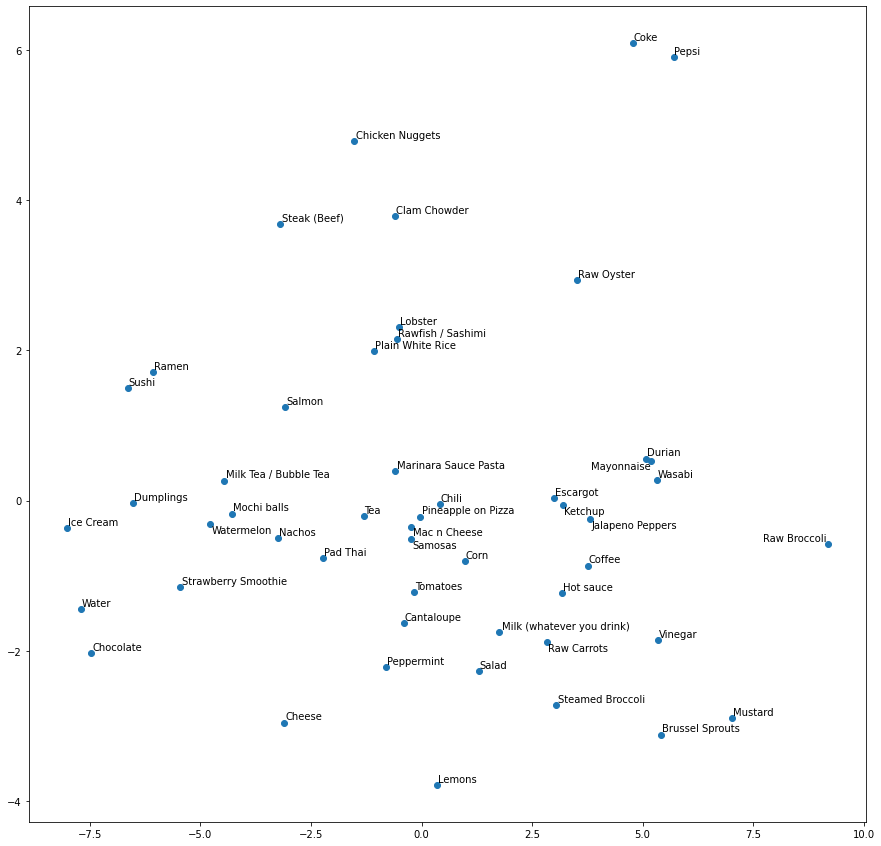

In [28]:
from matplotlib import pyplot as plt
from adjustText import adjust_text

fig = plt.figure(figsize=(15, 15))

#plot_3d = fig.add_subplot(2, 2, 1, projection="3d")
#plot_3d.scatter(*pc_3.T)

plot_2d = fig.add_subplot()
plot_2d.scatter(*pc_2.T)

labels = []
for food, coords in zip(food_labels, pc_2):
    labels.append(plt.text(coords[0], coords[1], food, ha="center", va="center"))

adjust_text(labels)

# Let's find cool correlations

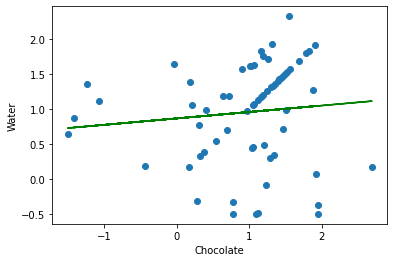

In [31]:
def correlation(food1, food2):
    idx_1 = food_labels.index(food1)
    idx_2 = food_labels.index(food2)

    x = mat[idx_1]
    y = mat[idx_2]

    plt.scatter(x, y)
    plt.xlabel(food1)
    plt.ylabel(food2)

    #calculate equation for trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    #add trendline to plot
    plt.plot(x, p(x), 'g')


correlation("Chocolate", "Water")